Annotate the growth cones in the timelapse. Load the signal channel and background, save an rgb .npy array for visualizing later. Main purpose here is however to label growth cones. Create some empty shapes layers in napari, then label manually. After that, run the SAVE axon labels cells. One can also read in already labelled axons using the LOAD cell. This also checks if a sequence of detections is continueos (no timepoints skipped).

In [1]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tifffile import imsave

import napari

In [2]:
# get the load_timelapse and load_mask function
%run 01_process_training_timelapses.ipynb
# get the load_axonIDs function
%run 02_label_training_timelapses.ipynb

Loaded functions `load_timelapse`, `load_mask` successfully.


SystemExit: Function `load_axonIDs` `timelapse2gui` loaded successfully.

/home/loaloa/programs/anaconda3/envs/napari-env-2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


SystemExit: Function `load_axonIDs` `timelapse2gui` loaded successfully.

In [3]:
plt.style.use('dark_background')
viewer = napari.Viewer()

In [4]:
data_path = '/run/media/loaloa/lbbSSD/training_data/'
tlapse_names = ['D00_G001', 'D04_G004', 'D19_G035']


In [11]:
def load_all_training_data(tlapse_names):
    signals, masks, lbls = [], [], []
    for i in range(len(tlapse_names)):
        basename = tlapse_names[i]
        signals.append(load_timelapse(basename, postfix=''))
        masks.append(load_timelapse_mask(basename, postfix=''))
        lbls.append(merge_axonID_files(basename))
    return signals, masks, lbls

In [6]:
def merge_all_training_data(signals, masks, lbls):
    last_t, last_ID = 0, 0
    final_lbls_adjusted, final_masks = [], []
    for i in range(len(signals)):
        ntimepoints = signals[i].shape[0]
        lbl = lbls[i].copy()
        # fix timepoints for concatenated data
        lbl.index += last_t
        # fix the axon names (count up)
        cols = [(f'Axon_{int(ax[-3:])+last_ID:0>3}', anch) for ax, anch in lbl.columns]
        lbl.columns = pd.MultiIndex.from_tuples(cols)
        
        # have the mask match the frames 
        final_masks.extend([masks[i] for _ in range(ntimepoints)])
        
        last_t += ntimepoints
        last_ID += len(lbl.columns.unique(0))
        final_lbls_adjusted.append(lbl)
    # merge everything
    final_lbls = pd.concat(final_lbls_adjusted, axis=1)
    final_signal = np.concatenate(signals, axis=0)
    final_mask = np.stack(final_masks, axis=0)
    return final_signal, final_mask, final_lbls

In [7]:
def save_all_training_data(all_signals, all_masks, all_lbls):
    print(f'Saving timelapse, masks and labels at {path}')
    imsave(all_signals, f'{data_path}/training_timelapse.tif')
    np.save(all_masks, f'{data_path}/training_mask.npy')
    pd.to_csv(all_lbls, f'{data_path}/training_labels.csv')

In [15]:
def validate_training_data(all_signals, all_masks, all_lbls, viewer):
    print(all_signals.shape)
    print(all_masks.shape)
    
    viewer.add_image(all_signals, contrast_limits=(0, 2**10))
    viewer.add_image(all_masks)
#     axonIDs2gui(all_lbls, viewer)
    

In [9]:
# get the load_timelapse and load_mask function
%run 01_process_training_timelapses.ipynb
# get the load_axonIDs function
%run 02_label_training_timelapses.ipynb

plt.style.use('dark_background')
viewer = napari.Viewer()

data_path = '/run/media/loaloa/lbbSSD/training_data/'
tlapse_names = ['D00_G001', 'D04_G004', 'D19_G035']


Loaded functions `load_timelapse`, `load_mask` successfully.


SystemExit: Function `load_axonIDs` `timelapse2gui` loaded successfully.

/home/loaloa/programs/anaconda3/envs/napari-env-2/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


SystemExit: Function `load_axonIDs` `timelapse2gui` loaded successfully.



=== `D00_G001` tif loaded ===
TxHxW: 37x2080x5764
dtype: uint16
min:0, max:4095
Frame wise min: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


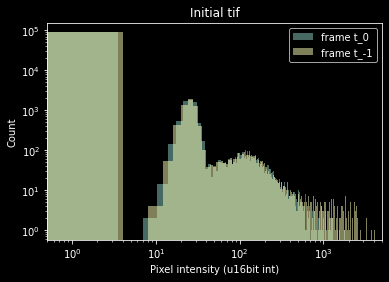

=== `D00_G001` npy mask loaded ===
HxW: 2080x5764

Loading labels for D00_G001. Found the following files: ['/run/media/loaloa/lbbSSD/training_data//all_labels_csvs/D00_G001_labels_IDs_000-099.csv']
Adding    Axon_000 Axon_001 Axon_002 Axon_003 Axon_004 Axon_005 Axon_006 Axon_007  \
   anchor_y anchor_y anchor_y anchor_y anchor_y anchor_y anchor_y anchor_y   
0    1180.0   1284.0     1159     1168   1168.0      NaN      NaN      NaN   
1    1205.0   1226.0     1159     1174   1173.0      NaN      NaN      NaN   
2    1256.0   1309.0     1164     1212   1212.0      NaN      NaN      NaN   
3    1325.0   1379.0     1159     1249   1273.0      NaN      NaN      NaN   
4    1420.0   1469.0     1162     1294   1282.0      NaN      NaN      NaN   
5    1476.0   1521.0     1164     1343   1343.0      NaN   1890.0      NaN   
6    1561.0   1588.0     1169     1395   1398.0      NaN   1886.0      NaN   
7    1645.0   1640.0     1172     1442   1450.0      NaN   1900.0      NaN   
8    1689.0   

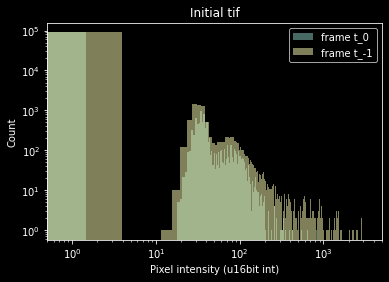

=== `D04_G004` npy mask loaded ===
HxW: 2080x5764

Loading labels for D04_G004. Found the following files: ['/run/media/loaloa/lbbSSD/training_data//all_labels_csvs/D04_G004_labels_IDs_000-066.csv']
Adding    Axon_000          Axon_001          Axon_002          Axon_003           \
   anchor_y anchor_x anchor_y anchor_x anchor_y anchor_x anchor_y anchor_x   
0    1651.0   1965.0      NaN      NaN      NaN      NaN      NaN      NaN   
1    1633.0   1954.0      NaN      NaN      NaN      NaN      NaN      NaN   
2    1605.0   1962.0      NaN      NaN      NaN      NaN      NaN      NaN   
3    1581.0   1978.0      NaN      NaN      NaN      NaN   1977.0   1620.0   
4    1574.0   1978.0      NaN      NaN      NaN      NaN   1969.0   1622.0   
..      ...      ...      ...      ...      ...      ...      ...      ...   
76   1309.0   2743.0      NaN      NaN   1325.0   2562.0   1449.0   1728.0   
77   1306.0   2744.0      NaN      NaN   1323.0   2558.0   1455.0   1730.0   
78   1310.0   

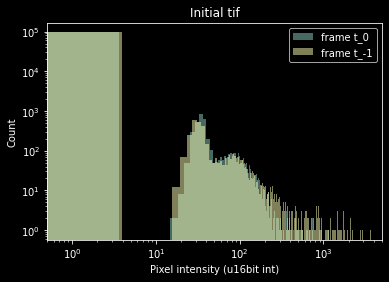

=== `D19_G035` npy mask loaded ===
HxW: 2080x5764

Loading labels for D19_G035. Found the following files: ['/run/media/loaloa/lbbSSD/training_data//all_labels_csvs/D19_G035_labels_IDs_000-132.csv']
Adding       Axon_000          Axon_001          Axon_002          Axon_003           \
      anchor_y anchor_x anchor_y anchor_x anchor_y anchor_x anchor_y anchor_x   
0.0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1.0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2.0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3.0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4.0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...        ...      ...      ...      ...      ...      ...      ...      ...   
205.0      NaN      NaN   1102.0    955.0      NaN      NaN      NaN      NaN   
206.0      NaN      NaN   1105.0    955.0      NaN      NaN      

In [12]:
signals, masks, lbls = load_all_training_data(tlapse_names)

In [13]:
all_signals, all_masks, all_lbls = merge_all_training_data(signals, masks, lbls)

In [16]:
validate_training_data(all_signals, all_masks, all_lbls, viewer)

(327, 2080, 5764)
(327, 2080, 5764)


In [ ]:
# timelapse 01
inp_path = '/home/loaloa/Documents/training_data/'
signal_tl140_file = inp_path+'D00_G001_RFP_compr.deflate.tif'
signal_tl140 = imread(signal_tl140_file)
H, W = signal_tl140.shape[1:]

mask_tl140_file = inp_path+'D00_G001_Transmission_compr.deflate_mask1.npy'
mask_tl140 = np.load(mask_tl140_file).astype(bool)
print(mask_tl140.shape)

# signal_tl140[:, ~mask_tl140] = 0

In [ ]:
# timelapse 13 design 04_G001
signal_tl13_D04_file = inp_path+'D04_G004_GFP_compr.deflate.tif'
signal_tl13_D04 = imread(signal_tl13_D04_file)[:80]
print(signal_tl13_D04.min())
signal_tl13_D04 -= 121
signal_tl13_D04[signal_tl13_D04<0] = 0
print(signal_tl13_D04.shape)
H_D04, W_D04 = signal_tl13_D04.shape[1:]

print(signal_tl13_D04.shape)
signal_tl13_D04 = np.pad(signal_tl13_D04, ((0,0),((H-H_D04)//2,(H-H_D04)//2),((W-W_D04)//2,(W-W_D04)//2)), mode='constant') 
print(signal_tl13_D04.shape)


mask_tl13_D04_file = inp_path+'D04_G004_Transmission_compr.deflate_mask1.npy'
mask_tl13_D04 = np.load(mask_tl13_D04_file).astype(bool)
print(mask_tl13_D04.shape)
mask_tl13_D04 = np.pad(mask_tl13_D04, (((H-H_D04)//2,(H-H_D04)//2), ((W-W_D04)//2,(W-W_D04)//2)), mode='constant') 
print(mask_tl13_D04.shape)

# signal_tl13_D04[:, ~mask_tl13_D04] = 0

In [ ]:
# timelapse 13 design 19_G035
signal_tl13_D19_file = inp_path+'D19_G035_GFP_compr.deflate.tif'
signal_tl13_D19 = imread(signal_tl13_D19_file)
signal_tl13_D19 -= 121
signal_tl13_D19[signal_tl13_D19<0] = 0

print(signal_tl13_D19.shape)
H_D19, W_D19 = signal_tl13_D19.shape[1:]
# viewer.add_image(signal_tl13_D19)

# %matplotlib qt
# plt.hist(np.random.choice(signal_tl13_D19[200].flatten(), 100000), bins=1095, range=(0,1095), label='tl1_last', alpha=.5)
# print('1')
# plt.hist(np.random.choice(signal_tl13_D19[0].flatten(), 100000), bins=1095, range=(0,1095), label='tl1_first', alpha=.5)
# print('1')

In [ ]:
viewer = napari.Viewer()
viewer.add_image(signal_tl13_D19)

In [ ]:
mask = viewer.layers['Labels'].data.astype(bool)[0]
print(mask.shape)
# only a region of the timelapse was labelled. mask here
signal_tl13_D19[:, mask] = 0

In [ ]:
signal_tl13_D19 = np.pad(signal_tl13_D19, ((0,0),((H-H_D19)//2,(H-H_D19)//2),((W-W_D19)//2,(W-W_D19)//2)), mode='constant') 
print(signal_tl13_D19.shape)

mask_tl13_D19_file = inp_path+'D19_G035_Transmission_compr.deflate_mask1.npy'
mask_tl13_D19 = np.load(mask_tl13_D19_file).astype(bool)
print(mask_tl13_D19.shape)
mask_tl13_D19 = np.pad(mask_tl13_D19, (((H-H_D19)//2,(H-H_D19)//2), ((W-W_D19)//2,(W-W_D19)//2)), mode='constant') 
print(mask_tl13_D19.shape)

# signal_tl13_D19[:, ~mask_tl13_D19] = 0

In [ ]:
# glue all dataobjects together to one tif
print(len(signal_tl140))
print(len(signal_tl13_D04))
print(len(signal_tl13_D19))
final_img = np.concatenate([signal_tl140, signal_tl13_D04, signal_tl13_D19], axis=0)
final_img.shape

In [ ]:

ymin, ymax = 420, 2500
# Y crop
# final_img = final_img[:, ymin:ymax, :]
# print(final_img.shape)
fname = f'{inp_path}/training_timelapse.tif'
# imsave(fname, final_img, photometric='minisblack', compression='deflate', bigtiff=True)
final_img = imread(fname)

print(final_img.shape)
# viewer.add_image(final_img)

In [ ]:
# labels
bboxinfo_cols = ['anchor_x', 'anchor_y']

tl140_labels_fname = inp_path+'D00_G001_labels_IDs_000-099.csv'
tl140_labels = pd.read_csv(tl140_labels_fname, index_col=0, header=[0,1])
for col in bboxinfo_cols:
    ypad = -ymin
    tl140_labels.loc[:, (slice(None), col)] += ypad if 'y' in col else 0

ntimepoints = tl140_labels.shape[0]
print(ntimepoints)


tl13_D04_labels_fname = inp_path+'D04_G004_labels_IDs_100-166.csv'
tl13_D04_labels = pd.read_csv(tl13_D04_labels_fname, index_col=0, header=[0,1])[:-1]
# fix labels....
tl13_D04_labels.columns = pd.MultiIndex.from_tuples([(axon, coo.replace('y','x') if coo.endswith('y') else coo.replace('x','y')) for axon,coo in    tl13_D04_labels.columns])
# print(tl13_D04_labels)
for col in bboxinfo_cols:
    ypad = (H-H_D04)//2 -ymin
    xpad = (W-W_D04)//2
    tl13_D04_labels.loc[:, (slice(None), col)] += ypad if 'y' in col else xpad
tl13_D04_labels.index += ntimepoints
print(tl13_D04_labels.iloc[:,0])

ntimepoints += tl13_D04_labels.shape[0]
print(ntimepoints)

tl13_D19_labels_fname = inp_path+'D19_G035_labels_IDs_167-299.csv'
tl13_D19_labels = pd.read_csv(tl13_D19_labels_fname, index_col=0, header=[0,1])
# fix labels
tl13_D19_labels.columns = pd.MultiIndex.from_tuples([(axon, coo.replace('y','x') if coo.endswith('y') else coo.replace('x','y')) for axon,coo in    tl13_D19_labels.columns])
for col in bboxinfo_cols:
    ypad = (H-H_D19)//2 -ymin
    xpad = (W-W_D19)//2
    tl13_D19_labels.loc[:, (slice(None), col)] += ypad if 'y' in col else xpad
tl13_D19_labels.index += ntimepoints
print(tl13_D19_labels.iloc[:,0])



all_labels = pd.concat([tl140_labels, tl13_D04_labels, tl13_D19_labels])
print(all_labels)
check = all_labels.loc[:,(slice(None),'anchor_x')].fillna(False).astype(bool)
plt.imshow(check)

all_labels.to_csv(inp_path+'axon_anchor_labels.csv')

In [ ]:
#masks
witht_mask_tl140 = np.stack([mask_tl140[ymin:ymax]]*len(signal_tl140))
witht_mask_tl13_D04 = np.stack([mask_tl13_D04[ymin:ymax]]*len(signal_tl13_D04))
witht_mask_tl13_D19 = np.stack([mask_tl13_D19[ymin:ymax]]*len(signal_tl13_D19))
print(witht_mask_tl13_D19.shape)

final_mask = np.concatenate([witht_mask_tl140, witht_mask_tl13_D04, witht_mask_tl13_D19], axis=0).astype(bool)
print(final_mask.shape)
fname = f'{inp_path}/training_mask.npy'
np.save(fname, final_mask)

f= np.load(fname)
print(f)
print(f.shape)

In [ ]:
all_labels = pd.read_csv(inp_path+'axon_anchor_labels.csv', header=[0,1], index_col=0)
print(all_labels)
# final_img = imread(inp_path+'training_timelapse.tif')
# print(final_img.shape)
# mask = np.load(f'{inp_path}/training_mask.npy')
# print(mask.shape)


In [ ]:
import config
from matplotlib.colors import ListedColormap
from models.v1model import utils

sort = False
subtr_t0 = False
utils.turn_tex('on')
show = False

id_lifetime = all_labels.loc[:, (slice(None), 'anchor_y')].fillna(0).astype(bool).T
print(id_lifetime.shape)

# option to sort by ID lifetime length and to left-align the data to t0
if sort:
    id_lifetime = id_lifetime[np.argsort(id_lifetime.sum(1))]
if subtr_t0:
    id_lifetime_new = np.zeros_like(id_lifetime, bool)
    for i, axon_row in enumerate(id_lifetime):
        id_lives = np.where(axon_row)[0]
        id_lifetime_new[i, id_lives-id_lives[0]] = True
    id_lifetime = id_lifetime_new

fig, ax = plt.subplots(figsize=config.MEDIUM_FIGSIZE)
fig.subplots_adjust(left=.15)
# colormap that is white for False (ID not present at t) and green for True
ax.imshow(id_lifetime, cmap=ListedColormap([config.WHITE, config.DEFAULT_COLORS[0]]))
ax.set_title(f'ID lifetime - training data', fontsize=config.FONTS)
# if draw_verticle_lineat:
#     ax.vlines(draw_verticle_lineat, 0, id_lifetime.shape[0]-1, linewidth=.5, color='k')

# x, y axis setup
ax.tick_params(labelsize=config.SMALL_FONTS)
ax.set_xticks(np.arange(0,id_lifetime.shape[1], 40))
ax.set_xlabel('timepoint', fontsize=config.FONTS)
ax.set_yticks(np.arange(0,id_lifetime.shape[0], 40))
ax.set_ylabel('Axon ID', fontsize=config.FONTS)

if show:
    plt.show()
fname = f'../master_thesis/methods_figures/ID_lifetime_taindata.svg'
plt.savefig(fname)
plt.close()

In [ ]:
final_img[~mask] = 0

In [ ]:
n = 0
# viewer.add_image(signal_tl140, colormap='red')
# viewer.add_image(signal_tl13_D04, colormap='green')
# viewer.add_image(signal_tl13_D19, colormap='green')
viewer.add_image(final_img, colormap='red')

# tl13_D04_labels = pd.read_csv(tl13_D04_labels_fname, index_col=0, header=[0,1])

for axon in all_labels.columns.unique(0):
    if not int(axon[-3:])%13:
        print(axon)
        ax_data = all_labels.loc[:, (axon,['anchor_y','anchor_x'])]
        dat = np.concatenate([all_labels.index.values[:, np.newaxis]-n, ax_data], axis=-1)

        col = np.random.rand(1,3)
        viewer.add_points(name=axon, data=dat, size=40, opacity=.25, face_color=col, ndim=3)


In [ ]:
%gui qt

In [ ]:
import napari
viewer = napari.Viewer()

In [ ]:
viewer.add_image(final_img)

In [ ]:
overflow_mask = final_img>4095
print(overflow_mask.sum())
final_img[overflow_mask] = 0


In [ ]:
%matplotlib qt

plt.hist(np.random.choice(final_img[36].flatten(), 100000), bins=1095, range=(0,4095), label='tl1_last', alpha=.5)
print(final_img[36].min())
print(final_img[36].max())

plt.hist(np.random.choice(final_img[0].flatten(), 100000), bins=1095, range=(0,4095), label='tl1_first', alpha=.5)
print(final_img[0].min())
print(final_img[0].max())


plt.hist(np.random.choice(final_img[115].flatten(), 100000), bins=1095, range=(0,4095), label='tl13_80_last', alpha=.5)
print(final_img[115].min())
print(final_img[115].max())
plt.hist(np.random.choice(final_img[38].flatten(), 100000), bins=1095, range=(0,4095), label='tl13_80_first', alpha=.5)
print(final_img[38].min())
print(final_img[38].max())


plt.hist(np.random.choice(final_img[120].flatten(), 100000), bins=1095, range=(0,4095), label='tl13_220_first', alpha=.5)
print(final_img[120].min())
print(final_img[120].max())
plt.hist(np.random.choice(final_img[324].flatten(), 100000), bins=1095, range=(0,4095), label='tl13_220_last', alpha=.5)
print(final_img[324].min())
print(final_img[324].max())

plt.legend()


In [ ]:
viewer.add_image(redchannel3)
viewer.layers['redchannel3'].blending = 'additive'
viewer.layers['redchannel3'].colormap = 'red'
viewer.layers['redchannel3'].contrast_limits = [0,2700]

# viewer.add_image(greychannel)
# viewer.layers['greychannel'].blending='additive'
# viewer.layers['greychannel'].opacity = .1
# viewer.layers['greychannel'].gamma = .6

dest_dir = '/home/loaloa/Documents/D19_G035_labels'

In [ ]:
# compute motion and add to viewer
blur_strength = 3
lowerlim = 100
print(f'Calculating motion (clip lower lim: {lowerlim}) + '
      f'Gaussian filtering (std: {blur_strength})...', end='')

from skimage.filters import gaussian

pos_motion_seq = [np.zeros((sizey, sizex), float)]
neg_motion_seq = [np.zeros((sizey, sizex), float)]
# first timepoint has no t-1, set to all 0. Recommend to not use t=0
print()
for t in range(1, sizet):
    motion_frame = redchannel[t].astype(float) - redchannel[t-1].astype(float)
    motion_frame = gaussian(motion_frame.astype(float), blur_strength)
        
    # clipping
    motion_frame[np.abs(motion_frame)<lowerlim] = 0

    pos_motion = np.where(motion_frame>0, motion_frame, 0).astype(np.uint16)
    neg_motion = np.where(motion_frame<0, motion_frame*-1, 0).astype(np.uint16)
    
    pos_motion_seq.append(pos_motion)
    neg_motion_seq.append(neg_motion)
    
print('Done.')

pos_motion_seq = np.stack(pos_motion_seq).astype(np.uint16)
neg_motion_seq = np.stack(neg_motion_seq).astype(np.uint16)

In [ ]:
viewer.add_image(pos_motion_seq)
viewer.layers['pos_motion_seq'].blending = 'additive'
viewer.layers['pos_motion_seq'].colormap = 'green'
viewer.layers['pos_motion_seq'].contrast_limits = [0,2700]

viewer.add_image(neg_motion_seq)
viewer.layers['neg_motion_seq'].blending = 'additive'
viewer.layers['neg_motion_seq'].colormap = 'blue'
viewer.layers['neg_motion_seq'].contrast_limits = [0,2700]


In [ ]:
# CREATE EMPTY AXON LABELS
axons_index = range(290,300)

for ax_i in axons_index:
    name = f'Axon_{ax_i:0>3}'
    col = np.random.rand(1,3)

    # edge coloring doesn't work unfortunately, do manually in gui
    viewer.add_points(name=name, edge_color=col, face_color=col, opacity=.25, size=35, ndim=3)

In [ ]:
# save labels
axons_index = range(259,300)

all_axons_data = []
for ax_i in axons_index:
    name = f'Axon_{ax_i:0>3}'
    dat = viewer.layers[name].data
    idx = pd.MultiIndex.from_product([(name,), ('anchor_x', 'anchor_y')])
    data = pd.DataFrame(dat[:,1:], index=dat[:,0], columns=idx, dtype=int)
    
    if ax_i == 137:
        print(data.to_string())
    if data.empty:
        print(dat)
        print(name)
    # print(data)
    all_axons_data.append(data)

# print(all_axons_data)
all_axons_data = pd.concat(all_axons_data, axis=1)

fname = f'{dest_dir}/labels_ID{axons_index[0]}-{axons_index[-1]}.csv'
all_axons_data.to_csv(fname) 
print(fname)
all_axons_data

In [ ]:
# save labels
all_axons_indices = [range(167,220), range(220,259), range(259,300)]
# os.listdir(dest_dir)

all_axons_data = []
for axons_index in all_axons_indices:
    data = pd.read_csv(f'{dest_dir}/labels_ID{axons_index[0]}-{axons_index[-1]}.csv', header=[0,1], index_col=0)
    all_axons_data.append(data)
    
    print(data)
all_axons_data = pd.concat(all_axons_data, axis=1)


all_axons_data.to_csv(f'{dest_dir}/labels_ID_all{all_axons_indices[0][0]}-{all_axons_indices[-1][-1]}.csv')

all_axons_data


In [ ]:
for axon in all_axons_data.columns.unique(0):
    ax_data = all_axons_data[axon]
    print(ax_data.shape)
    print(all_axons_data.index.values[:, np.newaxis].shape)
    dat = np.concatenate([all_axons_data.index.values[:, np.newaxis], ax_data], axis=-1)
    viewer.add_points(name=axon, data=dat)


In [ ]:
# SAVE AXONS
print('SAVING...')
axons_index = range(100)

# backup for safety always created new
dir_name = f'{outp_path}/labelled_axons_backup/labelled_axons n{len(axons_index)}.{time.ctime(time.time())}'
os.makedirs(dir_name, exist_ok=True)

all_axons_df = []
for ax_i in axons_index:
    name = f'Axon_{ax_i:0>3}'
    # old labelling, save base object as .npy, Used for loading axon bboxes in this script
    labels = np.array(viewer.layers[name].data)
    np.save(f'{dir_name}/{name}.npy', labels)   # safety backup
    np.save(f'{outp_path}/labelled_axons/{name}.npy', labels)   # what's actually used

    # make dataframe to save all information
    timepoints = labels[:,0,0].astype(int)
    print(f'{name} n={viewer.layers[name].nshapes}...', end='')
    # create a pandas dataframe for this specific axons
    idx = pd.MultiIndex.from_product([(name,),
                                    ('anchor_x', 'anchor_y', 'extend', 
                                     'topleft_x', 'topleft_y', 
                                     'bottomright_x', 'bottomright_y', 
                                     'distance', 'rel_distance',
                                     'col_r', 'col_g', 'col_b',)])
    dat = pd.DataFrame(index=range(sizet), columns=idx)
    
    # populate the dataframe with all the relvent bbox information
    color = viewer.layers[name].edge_color
    dat.loc[timepoints, (name, ['col_r', 'col_g', 'col_b'])] = color[:,:-1]
        
    start = labels[:, :,1:].min(axis=1).astype(int)
    end = labels[:,:,1:].max(axis=1).astype(int)
    dat.loc[timepoints, (name, 'topleft_x')] = start[:, 1]
    dat.loc[timepoints, (name, 'topleft_y')] = start[:, 0]
    dat.loc[timepoints, (name, 'bottomright_x')] = end[:, 1]
    dat.loc[timepoints, (name, 'bottomright_y')] = end[:, 0]

    x_dist, y_dist = end[:,1]-start[:,1], end[:,0]-start[:,0]
    extend = ((x_dist+y_dist)//4).astype(int)
    dat.loc[timepoints, (name, 'extend')] = extend

    anchor_x = (start[:,1] + extend).astype(int)
    anchor_y = (start[:,0] + extend).astype(int)
    dat.loc[timepoints, (name, 'anchor_x')] = anchor_x
    dat.loc[timepoints, (name, 'anchor_y')] = anchor_y
    # this is the old way of computing distance: simply eucl. 
    dist = np.sqrt((anchor_x-target[1])**2 + (anchor_y-target[0])**2)
    dat.loc[timepoints, (name, 'distance')] = dist
    dat.loc[timepoints, (name, 'rel_distance')] = dist[np.where(timepoints == min(timepoints))] - dist

    all_axons_df.append(dat)
    print('Ok.')
all_axons_df = pd.concat(all_axons_df, axis=1).sort_index(axis=1)
all_axons_df.to_csv(f'{outp_path}/labelled_axons_eucldists_new.csv')


In [ ]:
from skimage.color import gray2rgb
from skimage import img_as_float
from skimage.draw import rectangle_perimeter
from skimage import img_as_uint

redchannel_float = img_as_float(redchannel)

In [ ]:
rgb_image = np.zeros((sizet, sizey, sizex, 3), float)
rgb_image[:,:,:,0] = redchannel_float
rgb_image /= rgb_image.max()

In [ ]:
# LOAD AXONS AS LAYERS, or rgb image, show which timepoint is lablled 
as_shapes = True
print('LOADING axon bboxes....')
load_axons_range = range(100)

labelled = np.zeros((load_axons_range[-1]+1,sizet))
for i in load_axons_range:
    name = f'Axon_{i:0>3}'
    print(f'{name}...', end='')
    col = np.random.rand(1,3)
    dat = np.load(f'{outp_path}/labelled_axons/{name}.npy', )
    labelled[i,:] = [1 if t in dat[:,:,0].flatten() else 0 for t in range(sizet)]   # for plotting
    # dat[:,:,1] -= ymin
    # dat[:,:,2] -= xmin
    
    if not dat.size:
        print('!!!Empty!!!\n')
        continue
    dupl_label = any([(dat[:,:,0]==t).sum()>4 for t in range(sizet)])
    if dupl_label:
        [print(f't: {t} - More than one label!') for t in range(sizet) if (dat[:,:,0]==t).sum()>4]        
        print()
    else:
        print('Ok')
    if as_shapes:
        viewer.add_shapes(dat, name=name, shape_type='rectangle', edge_color=col, face_color=np.array([1,1,1,.9]), edge_width=5, visible=True, opacity=.9)
    else:
        start = dat[:, :,1:].min(axis=1).astype(int)
        end = dat[:,:,1:].max(axis=1).astype(int)
        x_start = start[:, 1]
        y_start = start[:, 0]
        x_end = end[:, 1]
        y_end = end[:, 0]
        
#         col = 1 - .35*(1-col) 
        axon_timepoints = dat[:,:,0].astype(int)
        for i, t in enumerate(range(axon_timepoints.min(), axon_timepoints.max()+1)):
            for w in range(2):
                rr, cc = rectangle_perimeter((y_start[i]+w, x_start[i]+w), end=(y_end[i]+w, x_end[i]+w), 
                                             shape=rgb_image.shape[1:])
                rgb_image[t-1, rr, cc] = col

plt.figure(figsize=(13,7), facecolor='k')
plt.imshow(labelled.T, cmap=plt.get_cmap('cividis'))
ax = plt.gca()

ax.set_yticks(np.arange(sizet))
ax.set_yticklabels(['' if t%5 else t for t in range(sizet)], color='white')
ax.set_ylabel('timepoint', color='white', fontsize=14)

ax.set_xticks(np.arange(load_axons_range[-1]+1))
ax.set_xticklabels(['' if t%2 else t for t in range(load_axons_range[-1]+1)], color='white')
ax.set_xlabel('Axon ID', color='white', fontsize=14)

ax.set_title('Yellow means there is an axon label for this timepoint', color='white', fontsize=18)
ax.set_yticks(np.arange(sizet))
ax.set_yticklabels(['' if t%4 else t+1 for t in range(sizet)], color='white')
ax.set_ylabel('timepoint', color='white', fontsize=14)

In [ ]:
viewer.add_image(rgb_image)